In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



In [24]:

df = pd.read_csv('winequality-red.csv',sep=';')

In [25]:
#df = pd.read_csv('winequality-red.csv',sep=';')
# Separate features and quality
x = df.drop('quality', axis=1) 
y = df['quality']
#Standardize the data
scaler = StandardScaler() 
xs = scaler.fit_transform(x)
# Split the dataset into training, validation, and testing sets (70:15:15)
x_train, x_temp, y_train, y_temp = train_test_split(xs, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)
# Train linear regression model
lr = LinearRegression()
cv_scores = cross_val_score(lr, x_train, y_train, cv=5)
lr.fit(x_train, y_train)
# Perform cross-validation 

#Test the model
y_pred = lr.predict(x_test)
accuracy=accuracy_score( y_test,np.round(y_pred))
print(f"Accuracy with all features: {accuracy}")

# Select the top 5 weights and corresponding features
weights = lr.coef_
top_5_idx = np.argsort(np.abs(weights))[-5:]
top_5_weights = weights[top_5_idx]
top_5_features = df.columns[top_5_idx]
print("Top 5 weights and corresponding features:")
for feature, weight in zip(top_5_features, top_5_weights):
    print(f"{feature}: {weight}")

X_train_top5 = x_train[:, top_5_idx]
X_test_top5 = x_test[:, top_5_idx]
lr_top5 = LinearRegression()
lr_top5.fit(X_train_top5, y_train)

# Test the model with top 5 weight features only
y_pred_top5 = lr_top5.predict(X_test_top5)
accuracy_top5 = accuracy_score(y_test, np.round(y_pred_top5))
print(f"Accuracy with top 5 weight features: {accuracy_top5}")



Accuracy with all features: 0.5916666666666667
Top 5 weights and corresponding features:
chlorides: -0.08543067823058008
total sulfur dioxide: -0.10548769062593155
sulphates: 0.15633203770605217
volatile acidity: -0.19463673569132225
alcohol: 0.28775333116289964
Accuracy with top 5 weight features: 0.6125


In [5]:
-np.sort(-abs(weights))

array([0.28775333, 0.19463674, 0.15633204, 0.10548769, 0.08543068,
       0.07986336, 0.07626915, 0.06319771, 0.05939832, 0.03923306,
       0.01948957])

In [6]:
df.columns[np.argsort(-np.abs(weights))]

Index(['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide',
       'chlorides', 'density', 'fixed acidity', 'residual sugar', 'pH',
       'citric acid', 'free sulfur dioxide'],
      dtype='object')

In [7]:
import time
start_time = time.time()


#SVM with all features and all kernels
svm=SVC( kernel='rbf', C=1.6)
# cv_scores = cross_val_score(svm, x_train, y_train, cv=5)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy=accuracy_score(y_test,np.round(y_pred))
print(f"Accuracy with all features for kernel= 'rbf': {accuracy}")

start_time = time.time()
#SVM with only top 5 features from linear regression
svm_top5 = SVC(kernel='rbf', C=1.6)
svm_top5.fit(X_train_top5, y_train)

# Test the model with top 5 weight features only
y_pred_top5 = svm_top5.predict(X_test_top5)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_top5 = accuracy_score(y_test, np.round(y_pred_top5))
print(f"Accuracy with top 5 weight features for kernel = 'rbf': {accuracy_top5}")






--- 0.09393715858459473 seconds ---
Accuracy with all features for kernel= 'rbf': 0.6333333333333333
--- 0.07632017135620117 seconds ---
Accuracy with top 5 weight features for kernel = 'rbf': 0.625


In [8]:
[117.9,328.1,22.1,452.8]
[84.4,289.8,17.4,354.4]

[84.4, 289.8, 17.4, 354.4]

In [9]:
#svm with top 5, C=1.6, and kernel = 'rbf'
svm_top5 = SVC(kernel='rbf', C=1.6)
svm_top5.fit(X_train_top5, y_train)

# Test the model with top 5 weight features only
y_pred_top5 = svm_top5.predict(X_test_top5)
accuracy_top5 = accuracy_score(y_test, np.round(y_pred_top5))


In [10]:
#Using regularization parameter to test if all features are necessary
# params = {'C':[0.8,0.9,1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]}


# svm=SVC( kernel='rbf')
# cv = GridSearchCV(estimator=svm, param_grid=params, cv=5, scoring='accuracy')
# cv.fit(x_train, y_train)
# print(f"Kernel = rbf:{cv.best_params_}")

# optimal_model = SVC(C = cv.best_params_['C'])
# optimal_model.fit(x_test, y_test)
# y_pred = optimal_model.predict(x_test)
# print(f"The score of the optimal model with kernel = rbf is: {optimal_model.score(x_test, y_test)}")
# print(y_pred)

In [11]:
# #Using regularization parameter to test if all features are necessary

# svm_top5 = SVC(kernel='rbf')
# cv_top5 = GridSearchCV(estimator=svm_top5, param_grid=params, cv=5, scoring='accuracy')
# cv_top5.fit(X_train_top5, y_train)
# print(f"Kernel = rbf:{cv_top5.best_params_}")

# # Test the model with top 5 weight features only
# y_pred_top5 = cv_top5.predict(X_test_top5)
# accuracy_top5 = accuracy_score(y_test, np.round(y_pred_top5))
# print(f"Accuracy with top 5 weight features for kernel = rbf: {accuracy_top5}")
# y_pred_top5


In [12]:

from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
rf = RandomForestClassifier() 
rf.fit(x_train, y_train)
rf_pred=rf.predict(x_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(accuracy_score(y_test,rf_pred))

--- 0.2895979881286621 seconds ---
0.6666666666666666


In [13]:
import time
start_time = time.time()
rf_5 = RandomForestClassifier() 
rf_5.fit(X_train_top5, y_train)
rf_pred_5=rf_5.predict(X_test_top5)
print("--- %s seconds ---" % (time.time() - start_time))
print(accuracy_score(y_test,rf_pred_5))

--- 0.25639986991882324 seconds ---
0.6833333333333333


In [26]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
neigh_pred=neigh.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))

accuracy_score(y_test,neigh_pred)

--- 0.019649028778076172 seconds ---


0.5333333333333333

In [27]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_top5, y_train)
neigh_pred_5=neigh_5.predict(X_test_top5)
print("--- %s seconds ---" % (time.time() - start_time))

accuracy_score(y_test,neigh_pred_5)

--- 0.018586158752441406 seconds ---


0.5708333333333333

In [16]:
from sklearn.ensemble import VotingClassifier

from sklearn import model_selection
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5); estimators.append(("knn", model1))
model2 = RandomForestClassifier(); estimators.append(("rd", model2))
model3 = SVC(kernel='rbf',C=1.6); estimators.append(("svm", model3))

ensemble = VotingClassifier(estimators)
import time
start_time = time.time()
ensemble.fit(x_train, y_train)
ensemble_pred=ensemble.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(y_test,ensemble_pred)


--- 0.43074703216552734 seconds ---


0.6458333333333334

In [17]:

ensemble_5 = VotingClassifier(estimators)
import time
start_time = time.time()
ensemble_5.fit(X_train_top5, y_train)
ensemble_pred_5=ensemble_5.predict(X_test_top5)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(y_test,ensemble_pred_5)


--- 0.3759019374847412 seconds ---


0.6291666666666667

In [18]:
res=[[],[]]

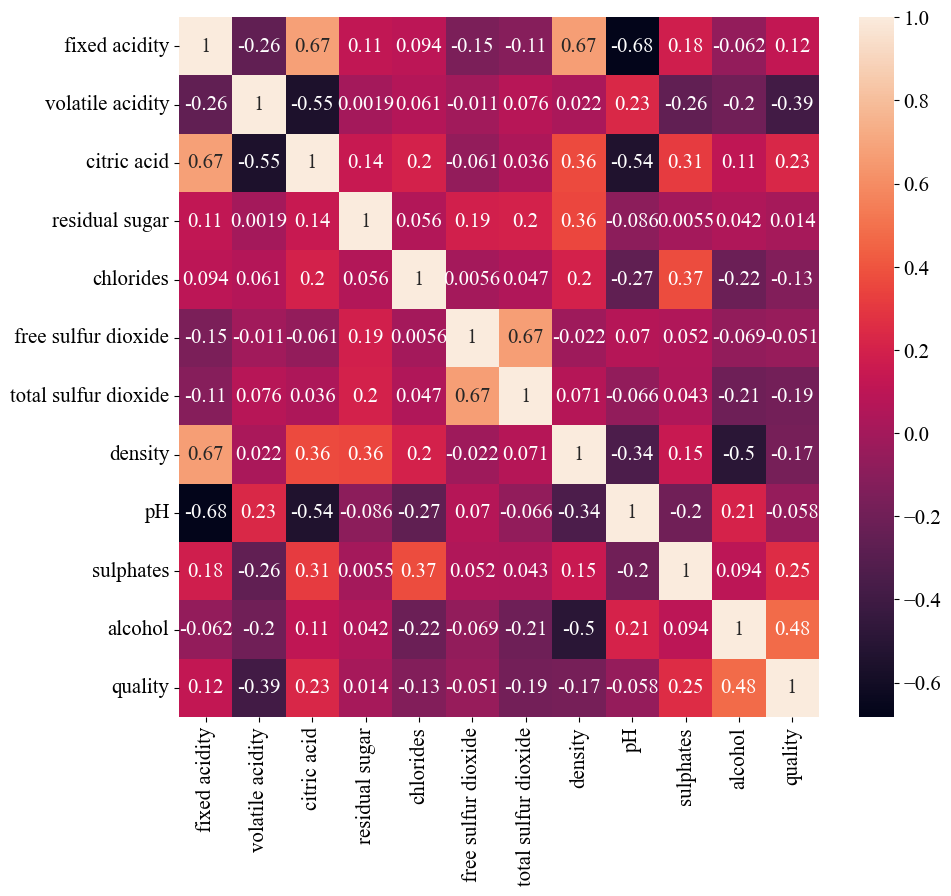

In [19]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

font = font_manager.FontProperties(family="Times New Roman",
                                   style='normal', size=15)
config = {
    "font.family":'serif',
    "font.size": 15,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

def margins(ax):
    ax.grid()
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1)
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0)
import seaborn as sb
plt.figure(figsize=[10,10]);
sb.heatmap(df.corr(),annot=True);
plt.subplots_adjust(left=0.2, right=1, bottom=0.2, top=0.9)

plt.savefig('corr.pdf')

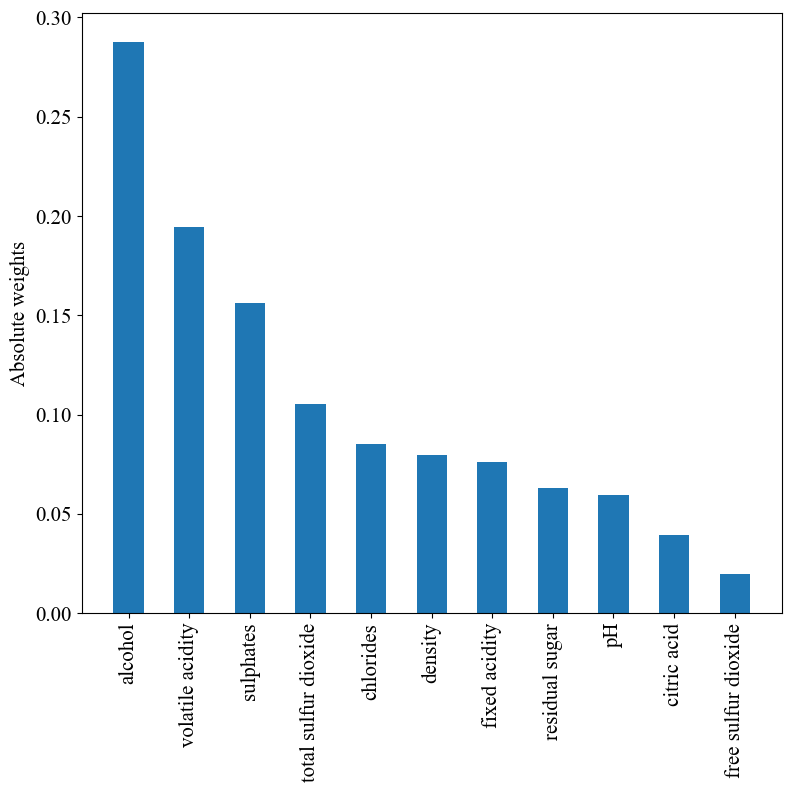

In [20]:
x_labels = ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides', 'density', 
            'fixed acidity', 'residual sugar', 'pH', 'citric acid', 'free sulfur dioxide']
heights = [0.28775333, 0.19463674, 0.15633204, 0.10548769, 0.08543068, 0.07986336, 0.07626915, 
           0.06319771, 0.05939832, 0.03923306, 0.01948957]

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))
# margins(ax)
# create a barplot
bar_width=0.5
ax.bar(x_labels, heights,width=bar_width)
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.3, top=0.9)
# set the title and axis labels
# ax.set_title('Barplot of wine features')
# ax.set_xlabel('Wine features')
ax.set_ylabel('Absolute weights')
plt.xticks(rotation=90)
plt.savefig('lrweight.pdf');

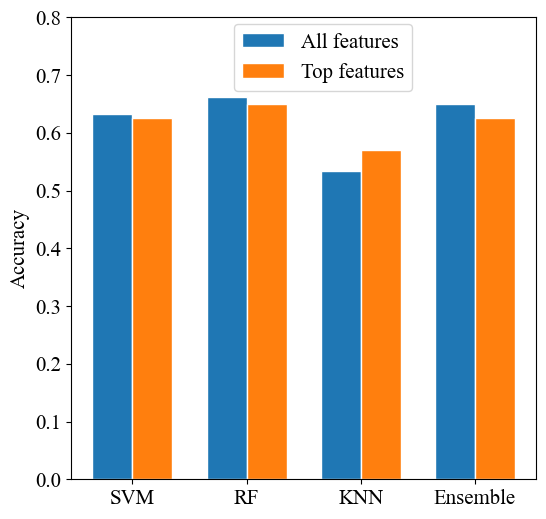

In [21]:


# Define the data
models = ['SVM', 'RF', 'KNN', 'Ensemble']
heights1 = [0.633, 0.6625, 0.533, 0.65]
heights2 = [0.625, 0.65, 0.57, 0.625]
fig, ax = plt.subplots(figsize=(6, 6))
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create the bar chart
ax.bar(r1, heights1,  width=bar_width, edgecolor='white', label='All features')
ax.bar(r2, heights2,  width=bar_width, edgecolor='white', label='Top features')

# Add xticks on the middle of the group bars

ax.set_xticks([r + bar_width/2 for r in range(len(models))], models)

# Add y-axis label
plt.ylabel('Accuracy')
plt.ylim([0,0.8])
# Add legend
plt.legend(loc=[0.35,0.84])

# Show the plot
plt.savefig('accuracy.jpg')


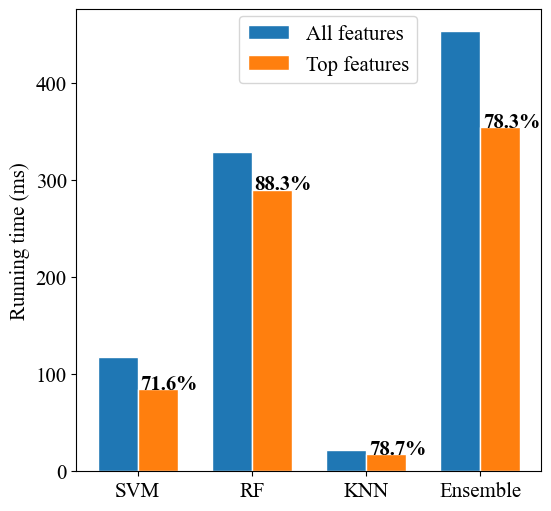

In [22]:



# Define the data
models = ['SVM', 'RF', 'KNN', 'Ensemble']
heights1 = [117.9,328.1,22.1,452.8]
heights2=[84.4,289.8,17.4,354.4]

fig, ax = plt.subplots(figsize=(6, 6))
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create the bar chart
ax.bar(r1, heights1,  width=bar_width, edgecolor='white', label='All features')
ax.bar(r2, heights2,  width=bar_width, edgecolor='white', label='Top features')
for i in range(len(heights2)):
    plt.text(r2[i]-0.15, heights2[i] + 0.01, str(np.round(100*(heights2[i])/heights1[i],1))+'%', color='black', fontweight='bold')
# Add xticks on the middle of the group bars

ax.set_xticks([r + bar_width/2 for r in range(len(models))], models)

# Add y-axis label
plt.ylabel('Running time (ms)')
# plt.ylim([0,0.8])
# Add legend
plt.legend(loc=[0.35,0.84])
plt.savefig('efficiency.jpg')
# Show the plot
plt.show()
